# Bike Sharing Assignment (Multiple Linear Regression)

#### Submitted by SOUMAYADEEP MANNA

### Problem Statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

__From the analysis company wants to know few of these factors :__

    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

__Business Goal:__

-  A efficient model needs to be build to find the variables which are significant the demand for shared bikes with the available independent variables.
-  The model will be a good way for management to understand the demand dynamics of a new market. 
-  Management can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## 1.  Data Sourcing

In [1]:
# importing all the required libraries and packages for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler   #scikit learn libraries
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm                     #stat model libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### 1.1 Reading and Understanding of the Data

In [2]:
# reading the 'day.csv' dataset for our analysis
bikeSharing = pd.read_csv('day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of the dataset
bikeSharing.shape

(730, 16)

In [4]:
# checking dataframe for basic info and null values
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All the 16 columns have 730 non-null values, so we can say that dataframe don't have any null values.

In [5]:
# checking numerical statistics of the dataframe
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking dataframe datatypes
bikeSharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### So, the dataset contents 730 rows of data, with 16 unique columns, and it is not containing any null values.

## 2.  Data Cleaning

### 2.1 Removing insignificant columns from the dataframe

From the provided Data dictionary following points have been analyzed and considered:

1.  __'instant'__ is a record index used for indexing purpose, so it will not effect in our analysis.
2.  __'dteday'__ is a date value,but as we already have few columns in the dataframe related to month, year, and week days we can remove this column.
3.  __'casual'__ and __'registered'__ variable is describes __'cnt'__ (casual + registered = target), 'cnt' is nothing but our target variable for the analysis. So we will not consider these two variables as well.  

In [7]:
# listing the columns that needs to be dropped from dataset
columnsTobeDropped = ['instant','dteday','casual','registered']

In [8]:
# dropping the following columns from the data frame
bikeSharing.drop(columnsTobeDropped, axis=1, inplace=True)
bikeSharing.shape

(730, 12)

Now the number of columns reduced to 12.

In [9]:
# checking the data
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 432x288 with 0 Axes>

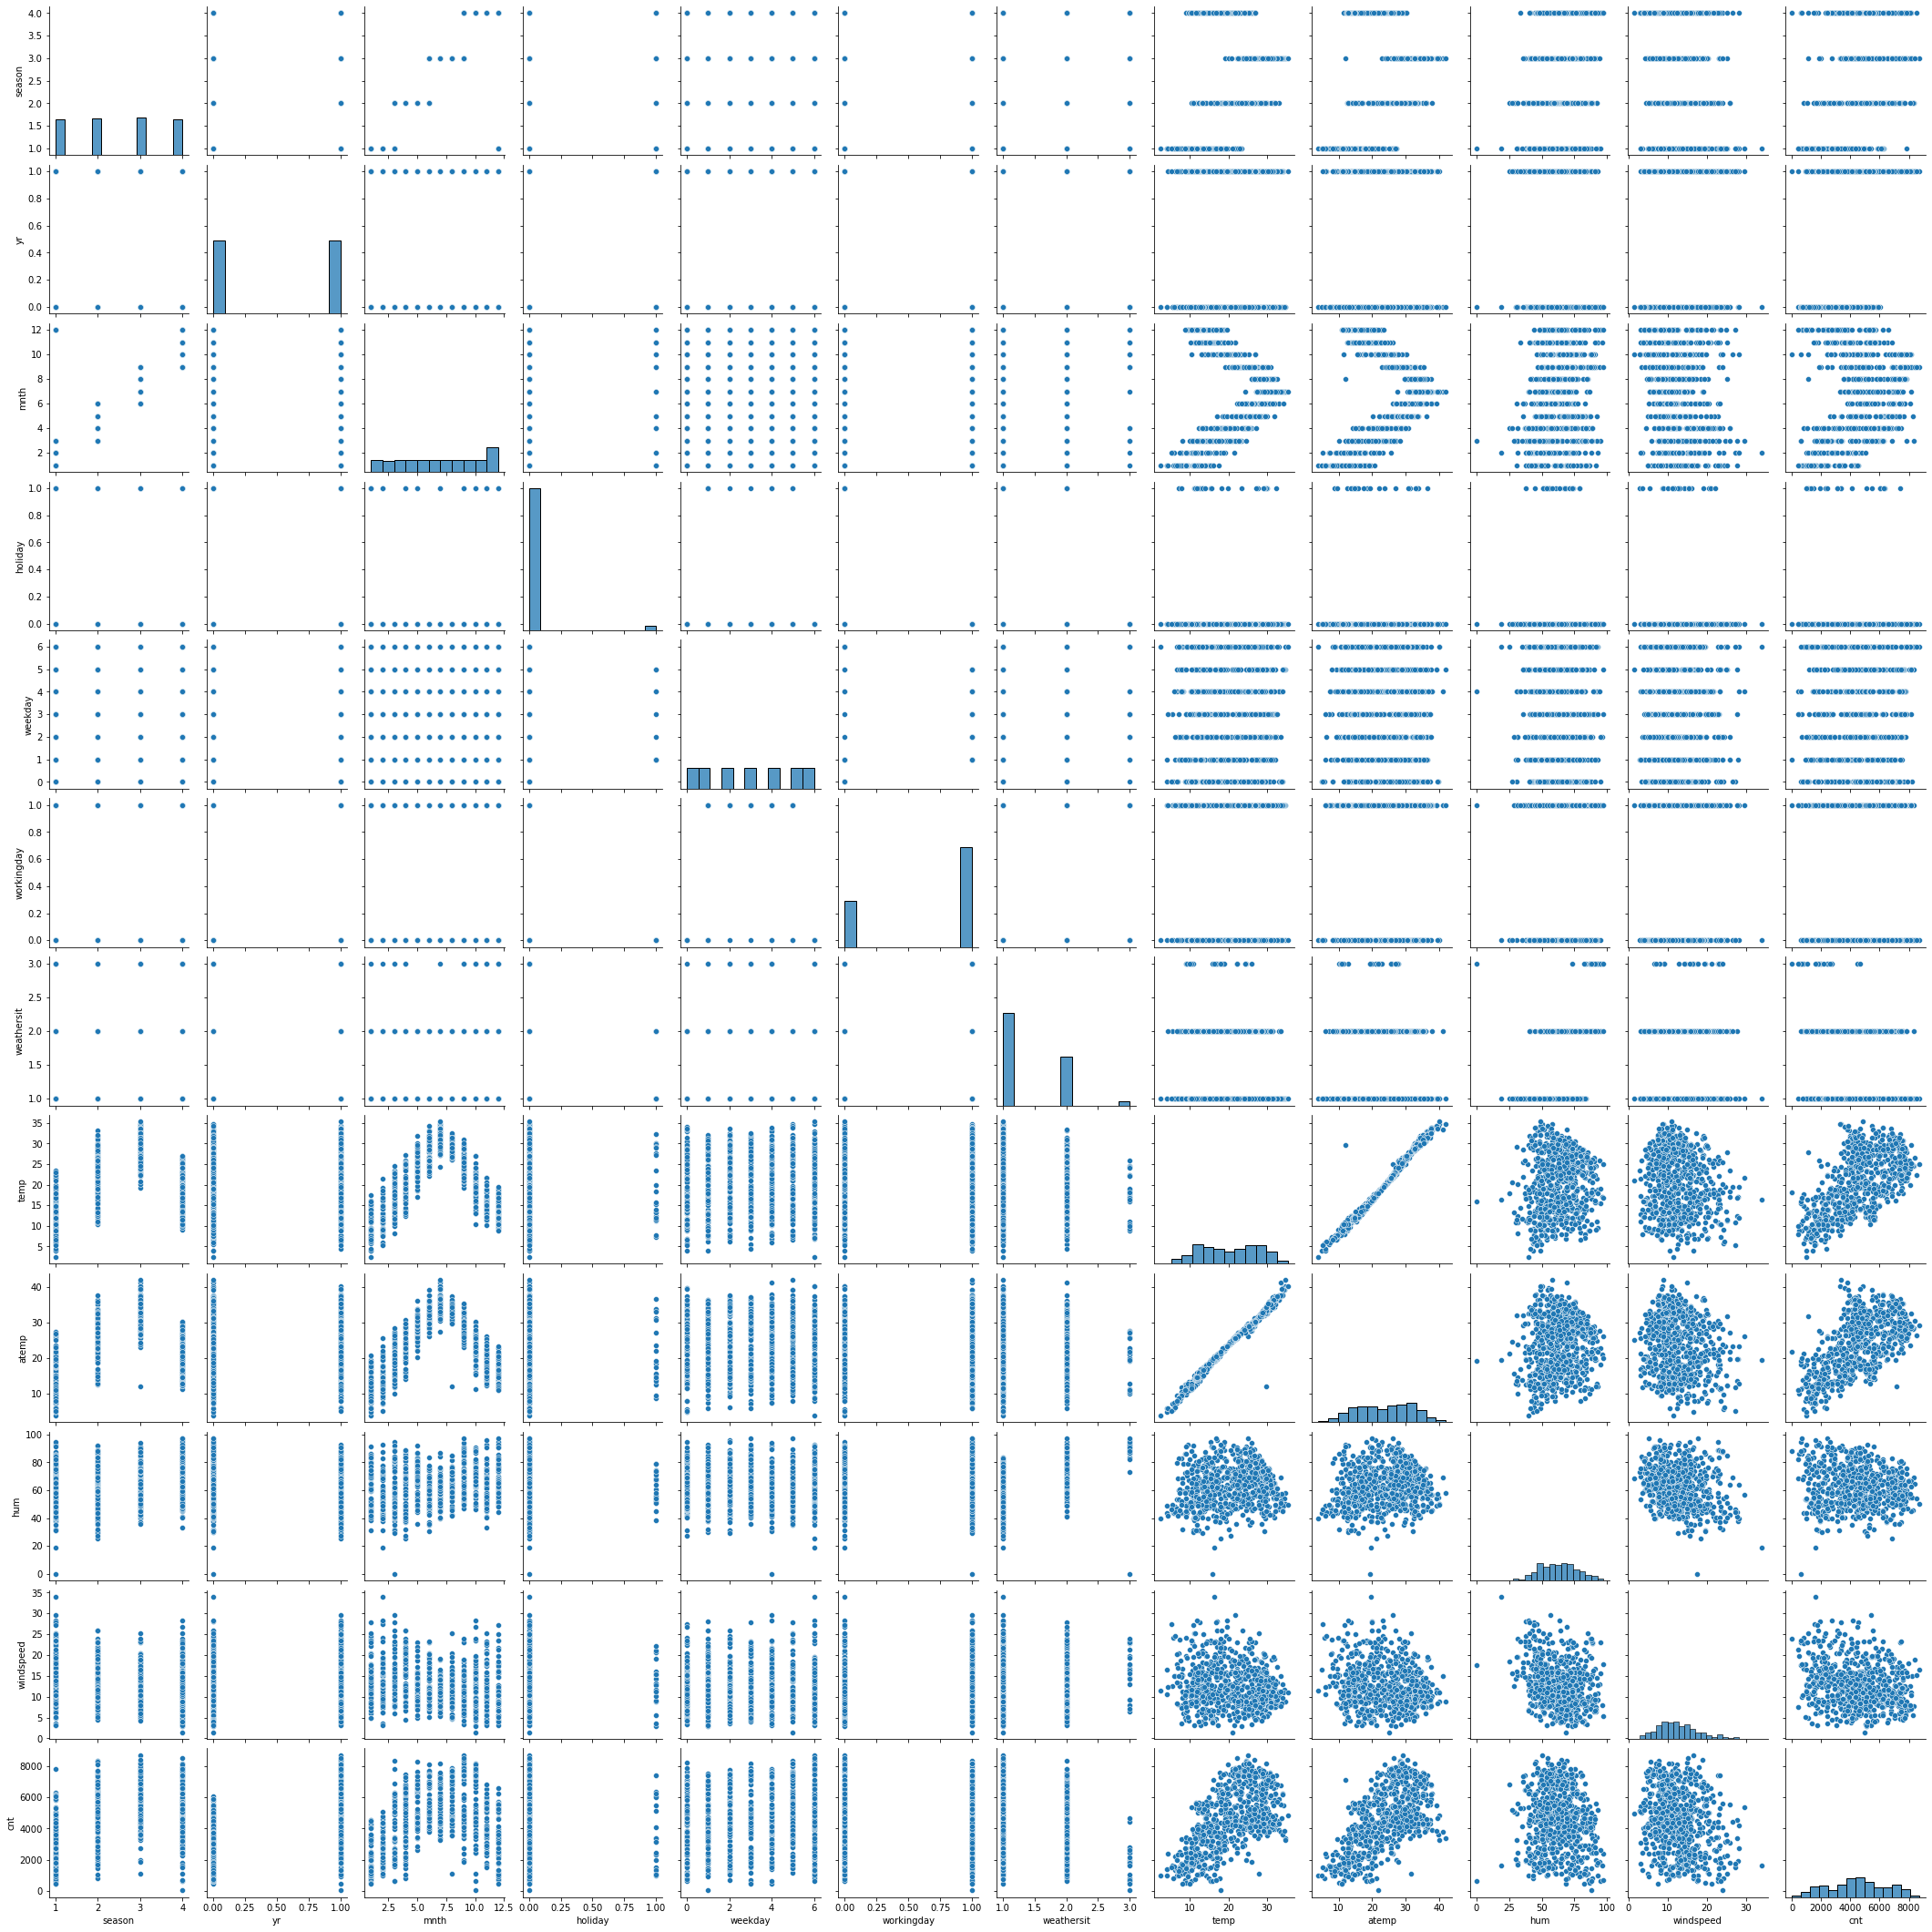

In [10]:
# drawing poir plot with all the dataframe varialbes
plt.figure()
sns.pairplot(bikeSharing)
plt.show()

In [11]:
# checking correlation between existing variables
bikeSharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


We can see that __'temp'__ and __'atemp'__ has the highest correlation of 0.99 among them, temp is temperature in Celsius and atemp is basically what the actual temperature feels like. As we can see they are highly co related with each other, we will drop __'temp'__ and keep __'atemp'__ for further analysis.

In [12]:
# dropping the 'temp' column from the data frame
bikeSharing.drop("temp",axis=1,inplace=True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### 2.2 Checking outlier for the numeric variables

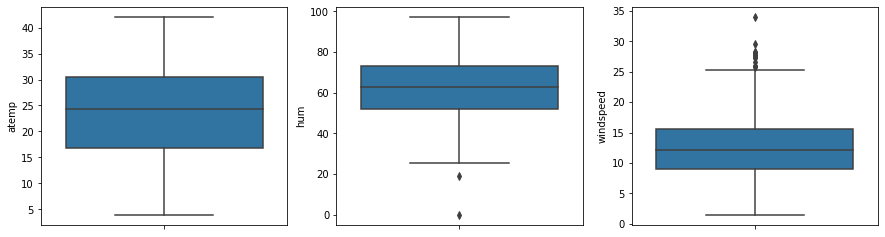

In [13]:
# creating box plots for the three numeric varialbes in the dataframe
plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)                
sns.boxplot( y = 'atemp', data = bikeSharing)               #Actual temperatue

plt.subplot(1,3,2)
sns.boxplot( y = 'hum', data = bikeSharing)                 #Humidity

plt.subplot(1,3,3)
sns.boxplot( y = 'windspeed', data = bikeSharing)           #Wind speed

plt.show()

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set.

## 3.  EDA

### 3.1 Creation and analysis of categorical variables

From the data dictionary we can convert few of these variables into categorical objects for better analysis purpose.

-  mnth : month ( 1 to 12)
-  weekday : day of the week
-  season : season (1:spring, 2:summer, 3:fall, 4:winter)
-  weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
# converting variables to categorical objects

# season replacing with spring, summer, fall and winter
bikeSharing.season = bikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# month replacing with January to December
bikeSharing.mnth = bikeSharing.mnth.replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

#weathersit replacing with clear, cloudy,bad and severe
bikeSharing.weathersit = bikeSharing.weathersit.replace({1:"Clear",2:"Cloudy",3:"Bad",4:"Severe"})

#weekdays replacing with Sunday to Saturday
bikeSharing.weekday = bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [15]:
# checking newly converted data frame
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


### 3.2 Plotting pair plots to check linear relationship among variables

<Figure size 432x288 with 0 Axes>

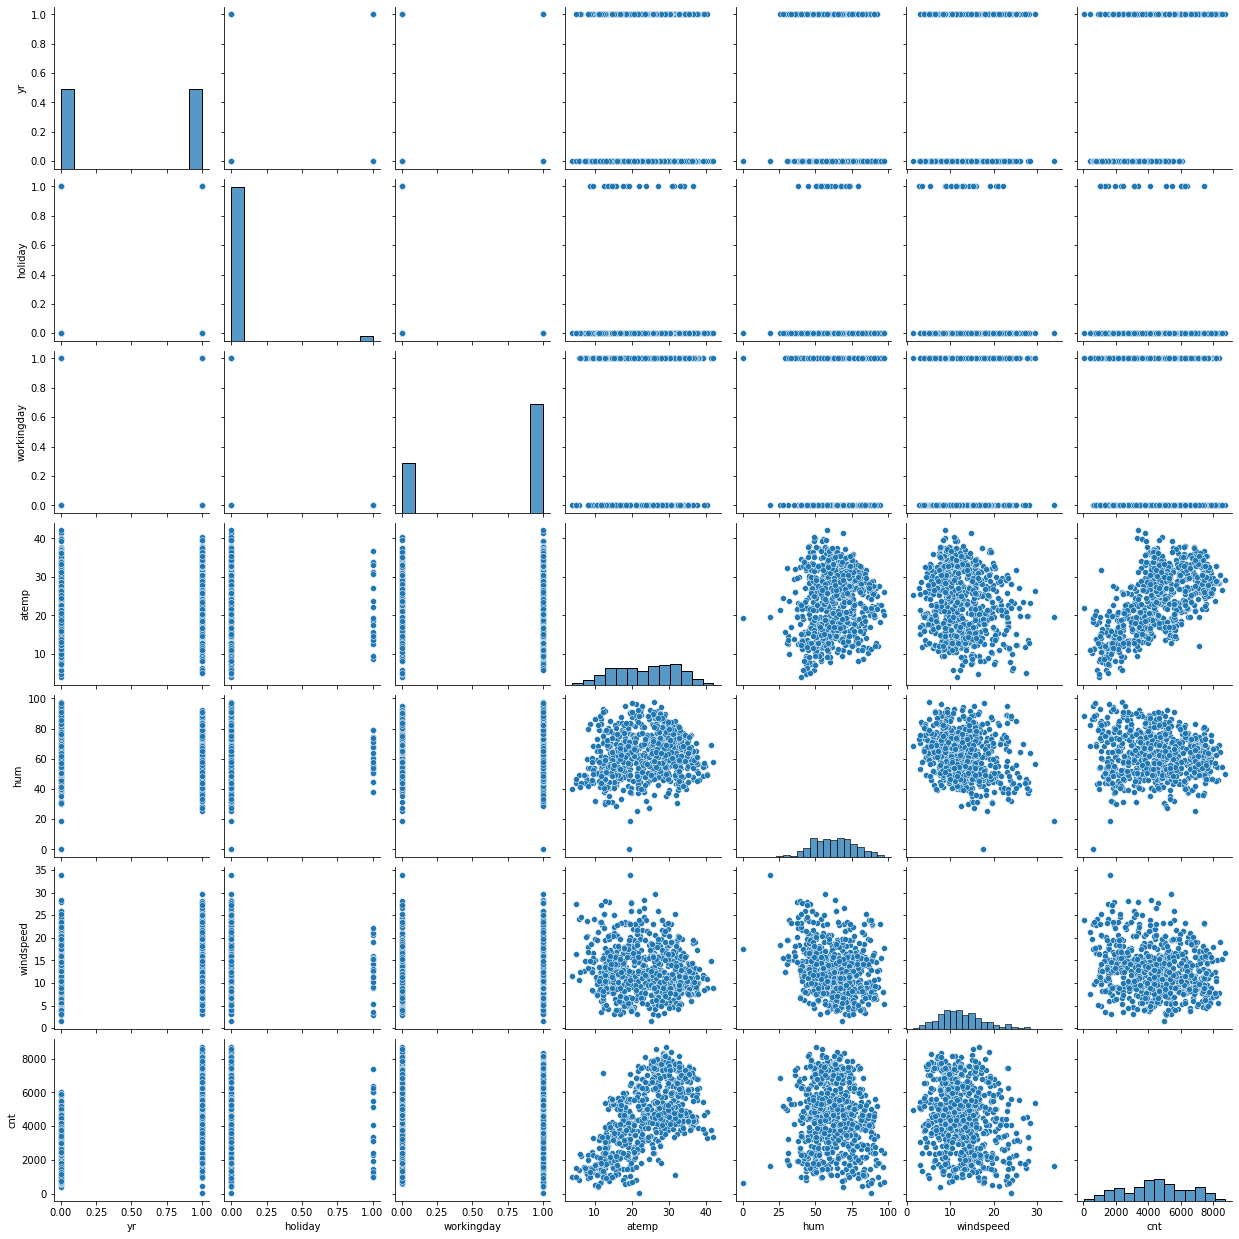

In [16]:
# drawing poir plot with all the dataframe varialbes
plt.figure()
sns.pairplot(bikeSharing)
plt.show()

__From the result of the correlation map we can see that, target variable has a linear relationship with the atemp.__

### 3.3 Plotting heat map to check correlation among variables

In [17]:
# checking the correlation coefficient of the variables
correlationValue = bikeSharing.corr() 

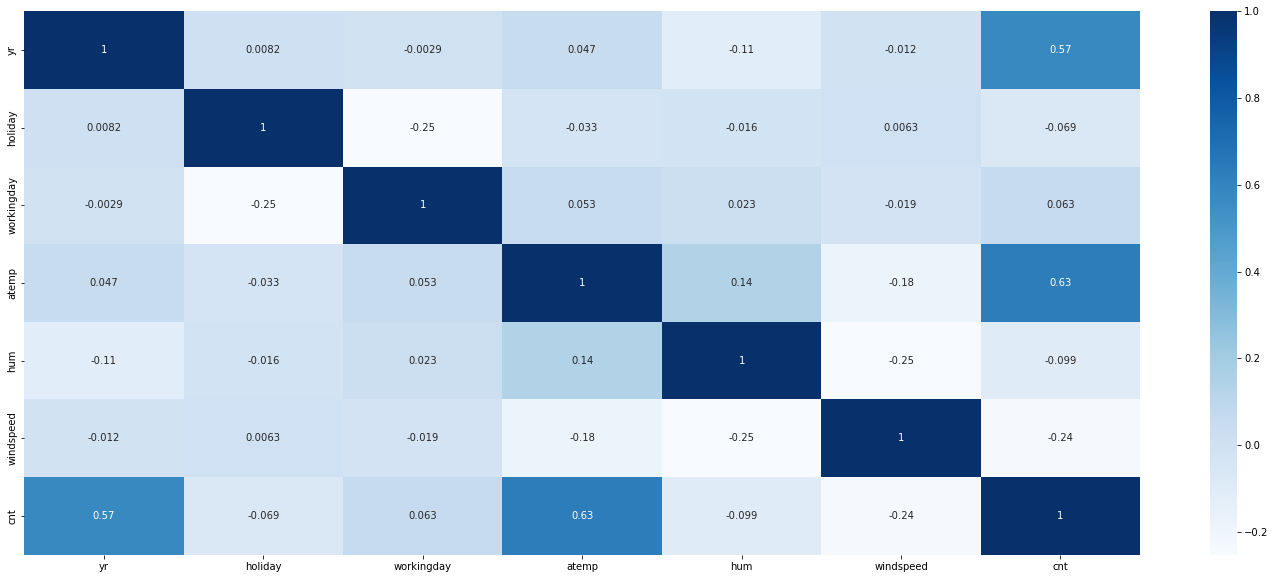

In [18]:
# plotting a Heat Map with the correlation coefficient of the variables
plt.figure(figsize=(25,10))
sns.heatmap(correlationValue,annot=True, cmap='Blues')
plt.show()

__From the heat map also we can see that temp has a positive correlation coefficient of 0.62 with target variable cnt, also yr has a positive correlation coefficient of 0.57 with target variable cnt.__

### 3.4 Analysis categorical variables with target variable

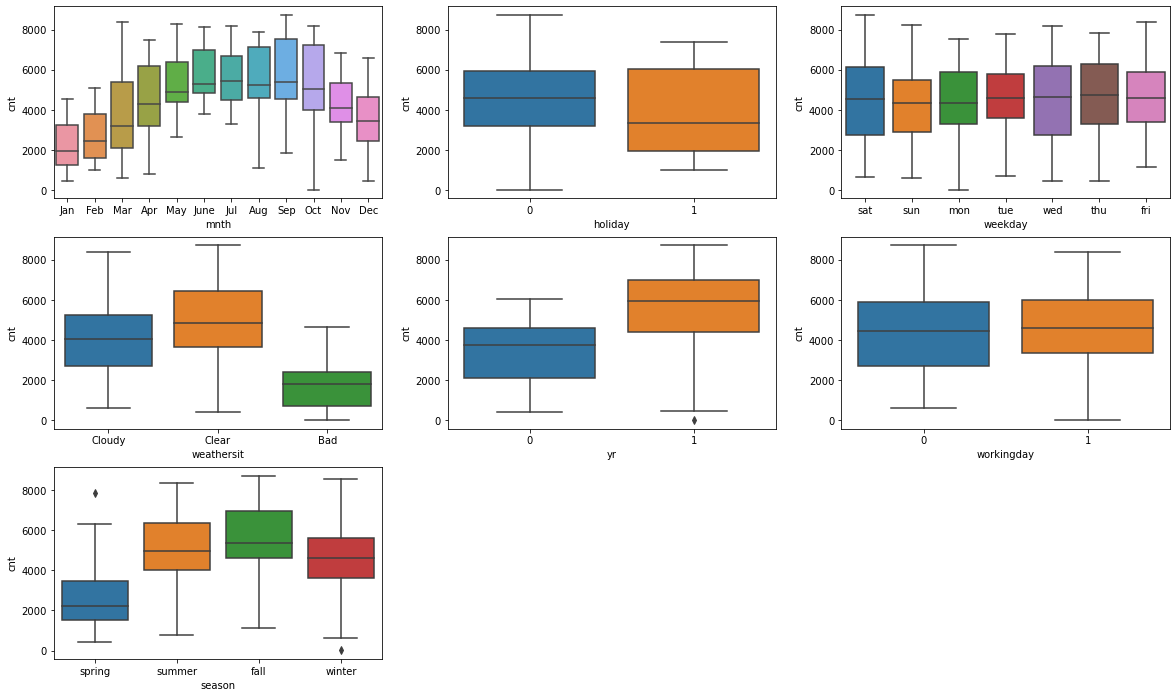

In [19]:
# creating box plots for the categorical variables with the target variable

plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)  # month

plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)  # holiday

plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)  # week days

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)  # weather condition

plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)  # year

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)  #  working days

plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)  #  seasons

plt.show()

__Following insights and points can be drawn from the above plots :__

1.  Month wise during September bike sharing is more, compare to year ending and starting it is the lowest.
2.  On holidays there is less demand of bike sharing.
3.  Days of the week not clearly distinguish any clear data.
4.  Bike sharing demand increases in clear weather conditions.
5.	Bike demand for the next year is high.
6.  Season wise Fall has the highest bike sharing demand.
7.  Month-wise bike sharing demand is gradually increasing till September and it starts to decrease gradually.

### 3.5 Distribution plot of the target variable

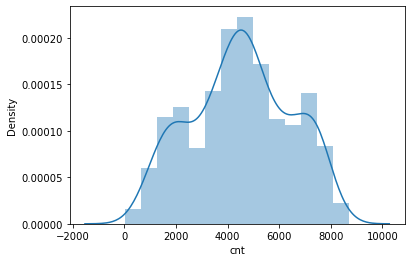

In [20]:
# creating distribution plot of the target variable
sns.distplot(bikeSharing['cnt'])
plt.show()

### 3.6 Checking co linearity of numeric variables with target variable

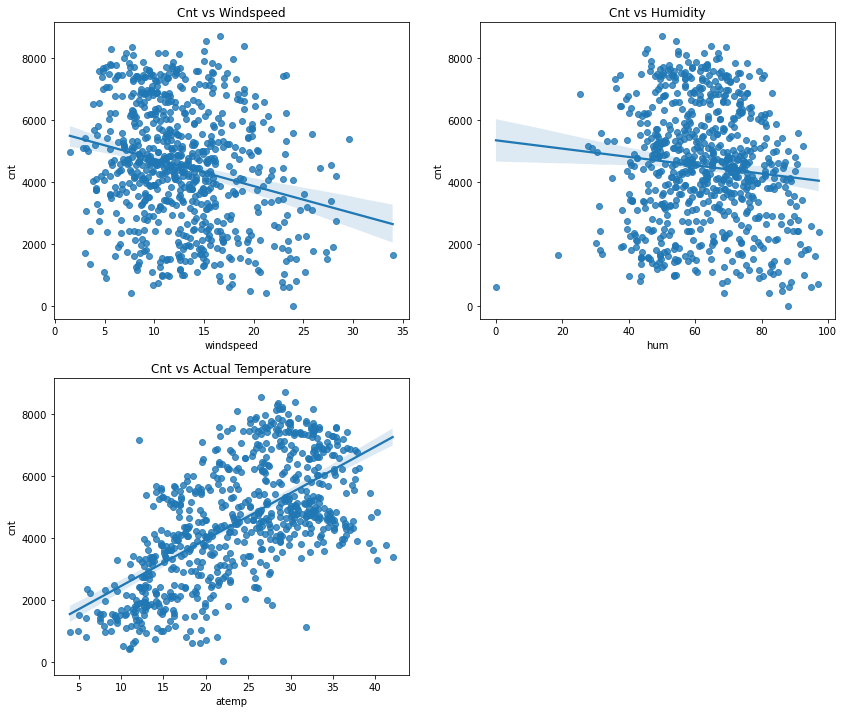

In [21]:
# creating regression plot for the all three numeric variables
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
plt.title("Cnt vs Windspeed")
sns.regplot(data=bikeSharing, x='windspeed', y='cnt')  # Wind speed

plt.subplot(2,2,2)
plt.title("Cnt vs Humidity")
sns.regplot(data=bikeSharing, x='hum', y='cnt')    # Humidity

plt.subplot(2,2,3)
plt.title("Cnt vs Actual Temperature")
sns.regplot(data=bikeSharing, x='atemp', y='cnt')   # Actual Temperature

plt.show()

__Among all the three plots 'atemp' vs 'cnt' shows the best fitted line, which describes its high level of co linearity.__

## 4.  Data Preparation for the Regression Model

### 4.1 Create dummy variables for the categorical variables

In [22]:
# dummy variables for the seasons
bikeSharing = pd.get_dummies(data=bikeSharing, columns=['season'], drop_first=True)

# dummy variables for the months
bikeSharing = pd.get_dummies(data=bikeSharing, columns=['mnth'], drop_first=True)

# dummy variables for the days of the week
bikeSharing = pd.get_dummies(data=bikeSharing, columns=['weekday'], drop_first=True)

# dummy variables for the weather conditions
bikeSharing = pd.get_dummies(data=bikeSharing, columns=['weathersit'])

-  Dropping the first because (n-1) dummies will be able to explain n categories.
-  Weathersit categories don't have 4:Severe condition value in the data set, so we are not applying drop_first=True, to keep all the other three values.

In [23]:
# checking number of new columns added to the data frame
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Bad', 'weathersit_Clear',
       'weathersit_Cloudy'],
      dtype='object')

In [24]:
bikeSharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Clear,weathersit_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
bikeSharing.shape

(730, 30)

## 5. Model Building

### 5.1 Split the data in to train and test sets

In [26]:
## Spliting the dataset into 7:3 ratio to create train and test set respectively
df_train,df_test = train_test_split(bikeSharing, test_size=0.3, random_state=100) 

In [27]:
# fetching new train and test set shapes
print(df_train.shape)
print(df_test.shape)

(511, 30)
(219, 30)


### 5.2 Rescaling the features of the continuous variables

In [28]:
# initializing MinMaxScaler object 
scaler = MinMaxScaler()

In [29]:
# creating list of the numeric variables
numericVar = ['atemp','hum','windspeed','cnt']

In [30]:
#performing fit and transform on the training set
df_train[numericVar] = scaler.fit_transform(df_train[numericVar])

In [31]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Clear,weathersit_Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.513133,0.650333,0.320844,0.514186,0.242661,0.246575,0.248532,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.212202,0.145741,0.169639,0.224737,0.429112,0.431440,0.432585,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332910,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529300,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754401,0.414438,0.688737,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Clear,weathersit_Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


Numeric variables are now scaled on a min max scale.

### 5.3 Building model using Recursive Feature Elimination(RFE) automated approach

In [33]:
## spliting the training set in to target and independent variables set

#target set
y_train = df_train.pop("cnt")
#independent set
X_train = df_train

In [34]:
print(y_train.shape)
print(X_train.shape)

(511,)
(511, 29)


In [35]:
# building linear regression model to fit the data

#LinearRegression object is intialized
lr = LinearRegression()
#fitting the data
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
# Applying RFE and cutting the feature count to 15 
rfe = RFE(lr,15)
#fitting the model
rfe = rfe.fit(X_train,y_train)

In [37]:
# listing the features rank wise selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 15),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', False, 11),
 ('mnth_June', False, 7),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 13),
 ('weathersit_Bad', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy', True, 1)]

In [38]:
# listing the features whic are selected by RFE method
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'weekday_sat',
       'weekday_sun', 'weathersit_Bad', 'weathersit_Clear',
       'weathersit_Cloudy'],
      dtype='object')

In [39]:
# features whic are eliminated by the RFE method
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### 5.4 Model Build with selected features using Stats Model and manual feature elimination 

In [40]:
## defining a function to build a linear regression model using Stats Model recursively

def build_stats_models(cols):
    X_train_rfe = sm.add_constant(X_train[cols])  ## adding constant value to the dataset for model building
    lm = sm.OLS(y_train,X_train_rfe).fit()        ## building and fitting linear regression model
    print(lm.summary())                           ## printing model summary
    return lm

In [41]:
## defining a function to get the VIF of the features using variance_inflation_factor method recursively

def estimate_vif(cols):
    X = X_train[cols]        ## loading the dataset
    vif = pd.DataFrame()     ## creating a vif dataframe
    vif['Features'] = X.columns   
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    ## calcualting VIF of the features
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))   ## printing the VIF values in decending order

In [42]:
#list of features selected from RFE 
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'weekday_sat',
       'weekday_sun', 'weathersit_Bad', 'weathersit_Clear',
       'weathersit_Cloudy'],
      dtype='object')

### Model 1

In [43]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.54e-189
Time:                        23:05:08   Log-Likelihood:                 508.41
No. Observations:                 511   AIC:                            -988.8
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0628      0.02

-  In __Model 1__ we can see high p-value for weekday_sun and VIF of 7 variables are pretty high so it is denoted as infinity. This states that the Model is not fully valid.

So, in next step re building the model by removing the 7 features whose VIF is infinity.

In [44]:
# selecting new set of features where VIF is not infinity
cols = ['atemp','season_summer','hum','season_winter','mnth_Aug','windspeed','mnth_Sep','yr']

### Model 2

In [45]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     263.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.08e-174
Time:                        23:05:08   Log-Likelihood:                 459.37
No. Observations:                 511   AIC:                            -900.7
Df Residuals:                     502   BIC:                            -862.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3091      0.027     11.292

__In Model 2 R-Squared and Adjusted Adj. R-squared value is reduced than Model 1 as no. of features decreases. Also, now we can see VIF of atemp and hum is very high.__

In [46]:
# eliminating hum as it has high VIF 
cols = ['atemp','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr']

### Model 3

In [47]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     232.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.68e-153
Time:                        23:05:08   Log-Likelihood:                 406.99
No. Observations:                 511   AIC:                            -798.0
Df Residuals:                     503   BIC:                            -764.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0840      0.019      4.342

__Model 3 gives R-squared value 0.764, which is less then previous model, but now p-values are almost zero and VIF are in range of less than 5.__

In [48]:
# eliminating atemp and adding back hum to compare model
cols = ['hum','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr']

### Model 4

In [49]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     101.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           9.91e-92
Time:                        23:05:08   Log-Likelihood:                 262.61
No. Observations:                 511   AIC:                            -509.2
Df Residuals:                     503   BIC:                            -475.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5501      0.037     14.698

__Model 4 R squared value is reduces to 0.584 after removing atemp, which infer that atemp is dependent on the performance of the model.__

In [50]:
# Goign back to Model-3 features and adding more feature to test model performance
## adding weathersit_Bad and weekday_sun
cols = ['atemp','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun']

### Model 5

In [51]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.24e-169
Time:                        23:05:09   Log-Likelihood:                 449.60
No. Observations:                 511   AIC:                            -879.2
Df Residuals:                     501   BIC:                            -836.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0874      0.018      4.

__Model 5 performance increases after adding the features. Now R squared value is 0.800. P-value of the features are almost zero for everyone and VIF of the features is less than 5.__

Trying few other models with feature combinations to check if the performance of the model increases.

In [52]:
# adding weekday_sat  and weathersit_Clear feature
cols = ['atemp','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun','weathersit_Clear','weekday_sat']

### Model 6

In [53]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.51e-184
Time:                        23:05:09   Log-Likelihood:                 490.78
No. Observations:                 511   AIC:                            -957.6
Df Residuals:                     499   BIC:                            -906.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0440      0.017  

__Model performance is significantly increased than the previous one, but p-value of newly added feature weekday_sat is high, which increase VIF of atemp and model F-Stat value decreases.__

In [54]:
# removing weekday_sat feature and adding holiday
cols = ['atemp','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun','weathersit_Clear','holiday']

### Model 7

In [55]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.12e-187
Time:                        23:05:09   Log-Likelihood:                 497.65
No. Observations:                 511   AIC:                            -971.3
Df Residuals:                     499   BIC:                            -920.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0506      0.017  

__Performance increase in Model 7 as R squared value is now 0.835, all the p-values are zero or tends towards zero.This Model selected on preliminary basis and can be considered for our analysis.__

In [56]:
# adding feature workingday
cols = ['atemp','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun','weathersit_Clear','holiday','workingday']

### Model 8

In [57]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.73e-186
Time:                        23:05:09   Log-Likelihood:                 498.03
No. Observations:                 511   AIC:                            -970.1
Df Residuals:                     498   BIC:                            -915.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0586      0.019  

__workingday feature is not significant for the model analysis as it is p-value is high.__ 

In [58]:
# adding feature weathersit_Cloudy and removing workingday
cols = ['atemp','season_summer','season_winter','mnth_Aug','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun','weathersit_Clear','holiday','weathersit_Cloudy']

### Model 9

In [59]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.12e-187
Time:                        23:05:09   Log-Likelihood:                 497.65
No. Observations:                 511   AIC:                            -971.3
Df Residuals:                     499   BIC:                            -920.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0098      0.01

__weathersit_Clear and weathersit_Cloudy has a very high VIF among themselves due to adding one of those features.__

In [60]:
# removing feature weathersit_Cloudy and mnth_aug
cols = ['atemp','season_summer','season_winter','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun','weathersit_Clear','holiday']

### Model 10

In [61]:
build_stats_models(cols)
estimate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.97e-185
Time:                        23:05:09   Log-Likelihood:                 489.86
No. Observations:                 511   AIC:                            -957.7
Df Residuals:                     500   BIC:                            -911.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0491      0.017  

__Model 10 gives the R squared value of 0.829 and Adj. R squared of 0.826 which is significantly good performance value. It infer that selected feature can interpret the target variable with 82.9 % accuracy. It has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi co-linear (high VIF) variables.__
-  Also P- values of the features are zero or tends to zero.
-  VIF of all the features are less than 5.0, which is well below threshold.



#### Though we have considered Model 7 previously, but Model 10 satisfy all the necessary threshold values and the performance of Model 10 is not that much of a difference from Model 10.


### Model 10 selected features we will be using for model prediction.

### 5.5 Final Model Building

In [62]:
# listing the selected features from model 10
final_features = ['atemp','season_summer','season_winter','windspeed','mnth_Sep','yr','weathersit_Bad','weekday_sun','weathersit_Clear','holiday']
final_features

['atemp',
 'season_summer',
 'season_winter',
 'windspeed',
 'mnth_Sep',
 'yr',
 'weathersit_Bad',
 'weekday_sun',
 'weathersit_Clear',
 'holiday']

In [63]:
# intializing liner regression object
lr = LinearRegression()
#fitting the data into the model
lr = lr.fit(X_train[final_features],y_train)

In [64]:
# printing the constant and coefficient values
print(lr.intercept_,lr.coef_)

0.04908765990633057 [ 0.57514967  0.08188966  0.12360843 -0.13526547  0.1001268   0.23432605
 -0.2016143  -0.05090977  0.08151608 -0.10455954]


## 6. Model Evaluation

### 6.1 Residual Analysis

In [65]:
# predicting the target variable based on the Latest Liner Regression model we have build
y_train_pred = lr.predict(X_train[final_features])

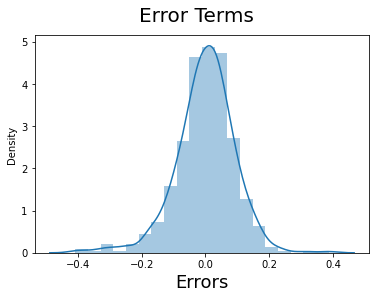

In [66]:
# Ploting the histogram/ distribution of error terms as part of residual analysis
fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins = 20)  ### error term = actual target value - predicted target value
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

plt.show()

__Errors are normally distributed here with mean 0. So its infer that the Model is predicting in a correct efficient manner.__

### 6.2 Linearity Check

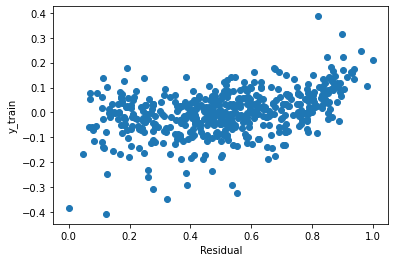

In [67]:
# scatter plot to check linearity of the residuals

residual = (y_train - y_train_pred)   ## calculating error term or residual
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")

plt.show()

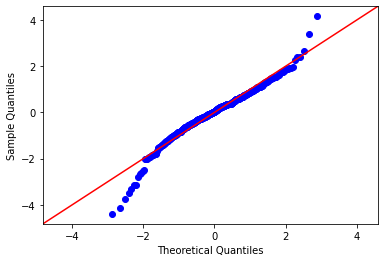

In [68]:
# plotting Q-Q plot to check the distribution of the error terms on train results
sm.qqplot(residual, fit = True, line = '45')
plt.show()

__Q-Q plot displaying fat tailed distribution properties for the residuals on train results.__

### 6.3 Calculating R2 score of the train set

In [69]:
r2_score(y_train,y_train_pred)

0.8292445081487766

### 6.4 Predict target value on test data set

In [70]:
# listing the numerical variables in test data set
numericVar = ['atemp','hum','windspeed','cnt']

In [71]:
# transforming the numerical variables using scaling
df_test[numericVar] = scaler.transform(df_test[numericVar])    ### only transform is performed on test data 

In [72]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Clear,weathersit_Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [73]:
#describing the test data set
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Clear,weathersit_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
## Spliting the test data set into target and independent variables

y_test = df_test.pop("cnt")  # target variable
X_test = df_test             # independent features

print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


In [75]:
# predicting the target variable based on the Latest Liner Regression model on test data
y_test_pred = lr.predict(X_test[final_features])

### 6.5 Calculating R2 score of test predictions

In [76]:
r2_score(y_test,y_test_pred)

0.7972211741065529

In [77]:
mean_squared_error(y_test,y_test_pred)

0.009631144211574877

__R2 score value for predictions on test data (0.797) and R2 score value of train data(0.829). Those two R-Squared values not much differ from each other then is difference of 2-3%, hence we can see our model is performing good even on unseen data (test data)__

Text(0, 0.5, 'y_test_pred')

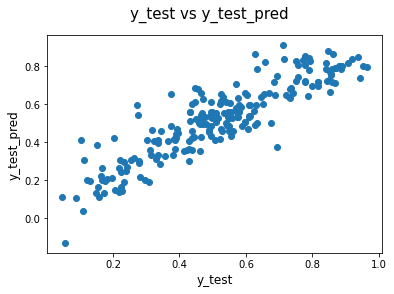

In [78]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_test_pred', fontsize = 12)

Variance of the error terms is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

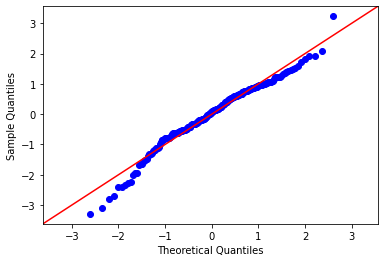

In [79]:
residual = (y_test - y_test_pred)

# plotting Q-Q plot to check the distribution of the error terms on test results
sm.qqplot(residual, fit = True, line = '45')
plt.show()

__Q-Q plot displaying slightly left skewed distribution properties for the residuals on the test results.__


## 7. Interpreting the Model

### 7.1 Analysis of the final model result

In [80]:
# printing statistical results of the final model
lm = build_stats_models(final_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.97e-185
Time:                        23:05:10   Log-Likelihood:                 489.86
No. Observations:                 511   AIC:                            -957.7
Df Residuals:                     500   BIC:                            -911.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0491      0.017  

__Multilinear Regression Analysis results:__ 

-  __After analyzing the final model, some of the important features can be interpreted as follows:__

    1. Bike Sharing demand is high during month of September, so company should expand their business in that time.
    2. Weather condition have impact on demand, so clear or normal weather that means spring season can be a good option to expand the business.
    3. There would be less bookings during Light Snow or Rain, these times company can utilize for maintenance purpose.


### Finally we can conclude that from the analysis it is clearly shown the business will follow the growth curve, so once the situations goes back to normal, company should more focus on customer and other features to expand their business on a large scale.

## Conclusion :

### __Significant variables for  predict the bike sharing demand are as follows :__

1. __Temperature__
2. __Humidity__
3. __Wind Speed__
4. __Holiday__
5. __Seasons (Spring, Fall etc.)__
6. __Year__
7. __Day of week(Sunday)__
8. __Weathersit(Clear, heavy rain, snow etc.)__
9. __Months (Sep,Jul, Aug, Jan, Dec )__

__We can see that the equation of our best fitted line is:__

 __cnt = 0.0491 + 0.5751 *  atemp + 0.0819  *  season_summer +0.1236 * season_winter - 0.1353  * windspeed + 0.1001 * mnth_Sep + 0.2343 * yr - 0.2016 * weathersit_Bad - 0.0509 * weekday_sun + 0.0815 * weathersit_Clear - 0.1046 * holiday__

__Overall we have a decent model, but further analysis and model building can also the performance of the model.__

======================================  END  =======================================